# Of Detecting Occupancy in an Office

## `Part One:` *A Hesitation in the Investigation* 

`Everything started in the evening of February the 4th. The office was luminous enough to settle the work...`

I am starting with investigating the data. Firstly I will import necessary Python modules and read the data.

In [38]:
import pandas as pd
import numpy as np
import graphviz
import sklearn
import matplotlib.pyplot as plt
from datetime import datetime

Reading the data into Pandas DataFrames as train, test1 and test2:

In [3]:
train = pd.read_csv("datatraining.txt")
test1 = pd.read_csv("datatest.txt")
test2 = pd.read_csv("datatest2.txt")

Now let me examine the training datasets...

In [11]:
print('Training Set')
print(train.head())
print()
print('Test Set 1')
print(test1.head())
print()
print('Test Set 2')
print(test2.head())

Training Set
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  

Test Set 1
                    date  Temperature  Humidity       Light         CO2  \
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144  2015-02-02 14:23:00      23.75

I shall investigate them further.

In [9]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Well... I really would like to see the date column too.

In [25]:
training_lines = []
with open('datatraining.txt', 'r') as f:
    training_lines = f.readlines()

# I am a case sensitive man.
training_lines[0] = '\"Id\",' + training_lines[0].replace('date', 'Date')
training_lines[0]

with open('datatraining_modified.csv', 'w') as f:
    f.writelines(training_lines)
# Do not forget to do the same thing to other data sets too.

Re-read training data:

In [183]:
train = pd.read_csv('datatraining_modified.csv')
train.head()

,Id,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Now I want to see the graph of everything with respect to the date in graphs. To do so, I need to convert date strings to Python datetime objects. This function should be handy:

In [43]:
def dateOrNotToDate(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')

Also, for plotting I may use a function like below:

In [112]:
def plot_graph(x_values_list, y_values_list):
    plt.plot(x_values_list, y_values_list)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

date_list will be the x-axis of the graphs:

In [79]:
date_list = []
for dd in train['Date'].values.tolist():
    date_list.append(dateOrNotToDate(dd))

Let's start plotting:

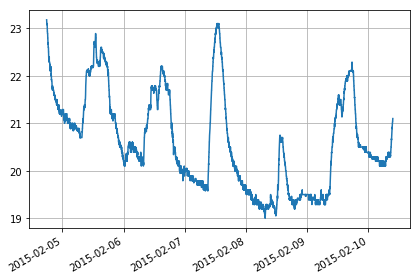

In [113]:
plot_graph(date_list, train['Temperature'].values.tolist())

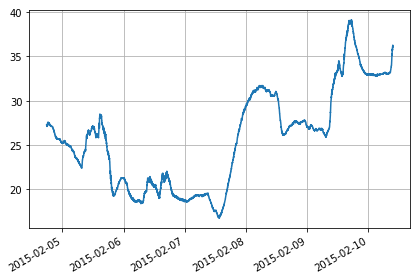

In [114]:
plot_graph(date_list, train['Humidity'].values.tolist())

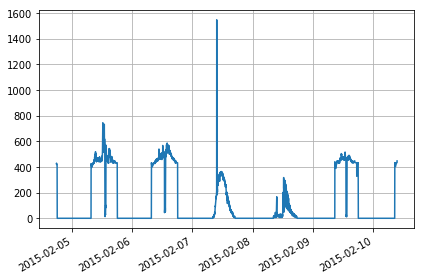

In [115]:
plot_graph(date_list, train['Light'].values.tolist())

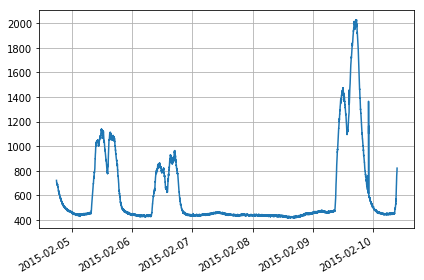

In [116]:
plot_graph(date_list, train['CO2'].values.tolist())

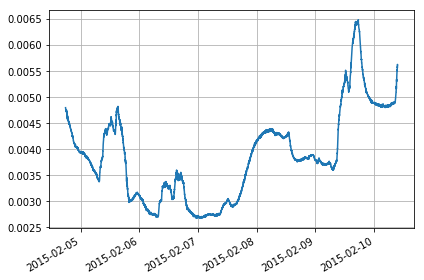

In [117]:
plot_graph(date_list, train['HumidityRatio'].values.tolist())

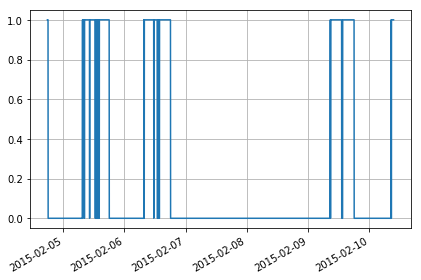

In [118]:
plot_graph(date_list, train['Occupancy'].values.tolist())

Well... A wide gap between 07-09.02.2015. I wonder if those days are weekend?

In [99]:
days = [
    'Monday',
    'Tuesday', 
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]
seventh_of_feb = datetime.strptime('2015-02-07', '%Y-%m-%d')
print(days[seventh_of_feb.weekday()])

Saturday


Just as I thought. The officers don't visit their place on weekends.

#### `Clue No. 1:` *Thy Deserted Office Remember'd Such Weekends...* 

And one more thing. What are the work hours?

If I could get the start indices of every day in the date_list, I could iterate through days...

In [177]:
day_start_indices = []
for i in range(5, 11):
    day_start_indices.append(
        date_list.index(datetime.strptime('2015-02-' + str(i) + ' 00:00:00', '%Y-%m-%d %H:%M:%S'))
    )
day_start_indices = [0] + day_start_indices

The data seems to be recorded between February 4th and 10th. Let's draw plots according to the time data:

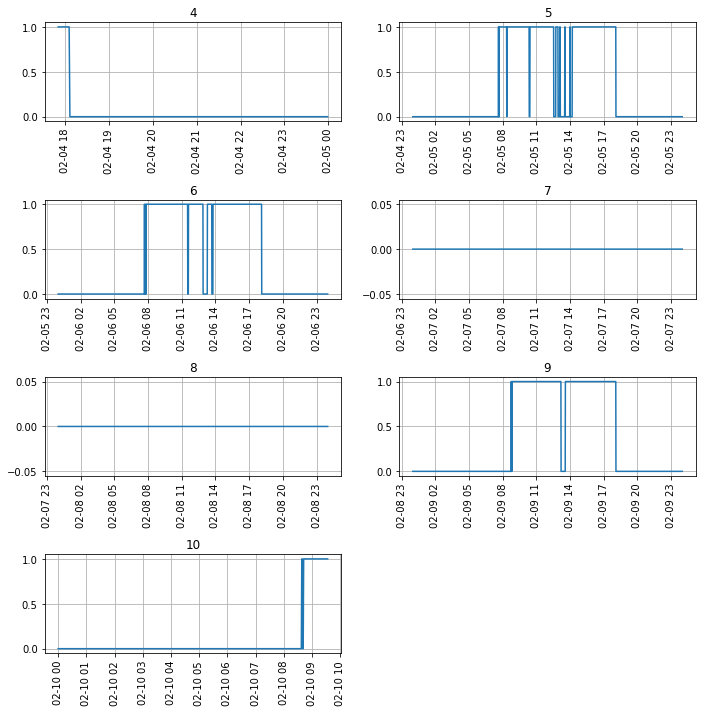

In [176]:
for i in range(len(day_start_indices)):    
    plt.subplot(4, 2, i + 1)
    if i != len(day_start_indices) - 1:
        plt.plot(date_list[day_start_indices[i]:day_start_indices[i+1]], train['Occupancy'].values.tolist()[day_start_indices[i]:day_start_indices[i+1]])
    else:
        plt.plot(date_list[day_start_indices[i]:], train['Occupancy'].values.tolist()[day_start_indices[i]:])
    plt.title(str(i + 4))
    plt.grid(True)
    plt.xticks(rotation=90)
    fig, ax = plt.gcf(), plt.gca()
    ax.xaxis_date()
    fig.set_size_inches(10, 10)
    fig.tight_layout()
plt.show()

So, what I conclude from these plots is I had better mind the working hours which are --rougly speaking-- between 8am and 6pm. I will make them certain when their time comes.

#### `Clue No. 2:` *Punctuality* 